# SIDDHARTH VERMA 22B2153 MIDSEM

# Steps and Major Decisions Taken to arrive at Solution

## Steps:  
1. Initial Data Exploration:
Imported Libraries: Utilized Pandas, NumPy, Matplotlib, Seaborn, Statsmodels, and Scikit-learn.
Loaded Dataset: Read and examined the "toptex.csv" dataset containing customer information.
Data Information: Explored data types, non-null counts, and descriptive statistics to understand the dataset.
2. Data Visualization:
Pair Plot: Employed pair plots to visualize relationships between different variables.
Correlation Heatmap: Created a heatmap to highlight correlations among variables.
3. Linear Regression Modeling:
Feature Selection: Chose 'accompanying_people', 'time_in_store', and 'Residence_distance_from_store' based on correlation analysis.
Data Splitting: Segregated the data into training and testing sets.
Linear Regression: Utilized Ordinary Least Squares (OLS) to build a regression model.
Model Evaluation: Assessed model performance using R-squared, Mean Squared Error (MSE), and related metrics.
4. Random Forest Modeling:
Data Preprocessing: Applied standard scaling and feature engineering.
Model Building: Constructed Linear Regression and Random Forest models.
Model Evaluation: Examined model performance using Mean Squared Error.
Feature Importance: Analyzed feature importance using Random Forest models.
5. Overall Purchase Prediction:
Linear Regression Model: Employed a Linear Regression model to predict the overall value of purchases.
Visualization: Plotted predictions against actual values using scatter plots and a 3D scatter plot.
6. Principal Component Analysis (PCA):
Feature Reduction: Applied PCA for dimensionality reduction.
Linear Regression: Built a Linear Regression model using the reduced feature set.
Model Evaluation: Assessed the model's performance.
7. Hypothesis Testing and Correlation Analysis:
T-tests: Conducted t-tests to compare total purchase amounts between gender groups.
Pearson Correlation: Calculated the correlation between time in store and total purchase amount.
8. Executive Recommendations:
Actionable Insights: Provided targeted recommendations based on analysis results, such as gender-specific marketing and strategies to increase time spent in the store.
9. Additional Analysis and Visualizations:
Distribution Plots: Visualized the distribution of each variable.
Residual Analysis: Examined residuals through scatter plots.
Scree Plot: Visualized explained variance in PCA using a scree plot.
10. Statistical Testing:
Durbin-Watson and Jarque-Bera Tests: Ensured normal distribution of errors in regression models.
11. Communication:
Clear Explanations: Presented results with clear explanations, interpretations, and visualizations.
Structured Documentation: Organized the analysis into well-defined steps.
12. Additional Model Evaluation:
Comparative Analysis: Evaluated the performance of Linear Regression and Random Forest models for both purchase and engagement predictions.

# Importing Required Libraries and Packages

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Importing "toptex.csv" data set using Pandas

In [22]:
data=pd.read_csv("toptex.csv")

In [23]:
data

,Cust_ID,Gender_F_Flag,Gender_M_Flag,Residence_distance_from_store,time_in_store,accompanying_people,family_size,total_purchase_amount
0,1,1,0,1,49,0,4,113
1,2,1,0,4,52,3,4,959
2,3,1,0,4,51,1,5,1247
3,4,0,1,8,38,3,4,2116
4,5,1,0,2,52,4,6,1472
...,...,...,...,...,...,...,...,...
4375,4376,0,1,0,34,3,4,1337
4376,4377,1,0,4,50,0,4,1094
4377,4378,1,0,7,54,5,5,1954
4378,4379,0,1,3,37,3,2,1074


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Cust_ID                        4380 non-null   int64
 1   Gender_F_Flag                  4380 non-null   int64
 2   Gender_M_Flag                  4380 non-null   int64
 3   Residence_distance_from_store  4380 non-null   int64
 4   time_in_store                  4380 non-null   int64
 5   accompanying_people            4380 non-null   int64
 6   family_size                    4380 non-null   int64
 7   total_purchase_amount          4380 non-null   int64
dtypes: int64(8)
memory usage: 273.9 KB


In [25]:
data.describe()

,Cust_ID,Gender_F_Flag,Gender_M_Flag,Residence_distance_from_store,time_in_store,accompanying_people,family_size,total_purchase_amount
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000
mean,2190.500000,0.702511,0.297489,5.003425,47.952740,3.019635,4.034475,1580.639498
std,1264.541419,0.457205,0.457205,2.226137,6.982038,1.721425,1.043668,439.721994
min,1.000000,0.000000,0.000000,0.000000,34.000000,0.000000,1.000000,113.000000
25%,1095.750000,0.000000,0.000000,3.000000,39.000000,2.000000,3.000000,1274.750000
50%,2190.500000,1.000000,0.000000,5.000000,52.000000,3.000000,4.000000,1566.000000
75%,3285.250000,1.000000,1.000000,6.000000,53.000000,4.000000,5.000000,1874.000000
max,4380.000000,1.000000,1.000000,16.000000,57.000000,11.000000,8.000000,3259.000000


## The Average Purchase Amount =1580.639498
## The Average Time in Store =47.95

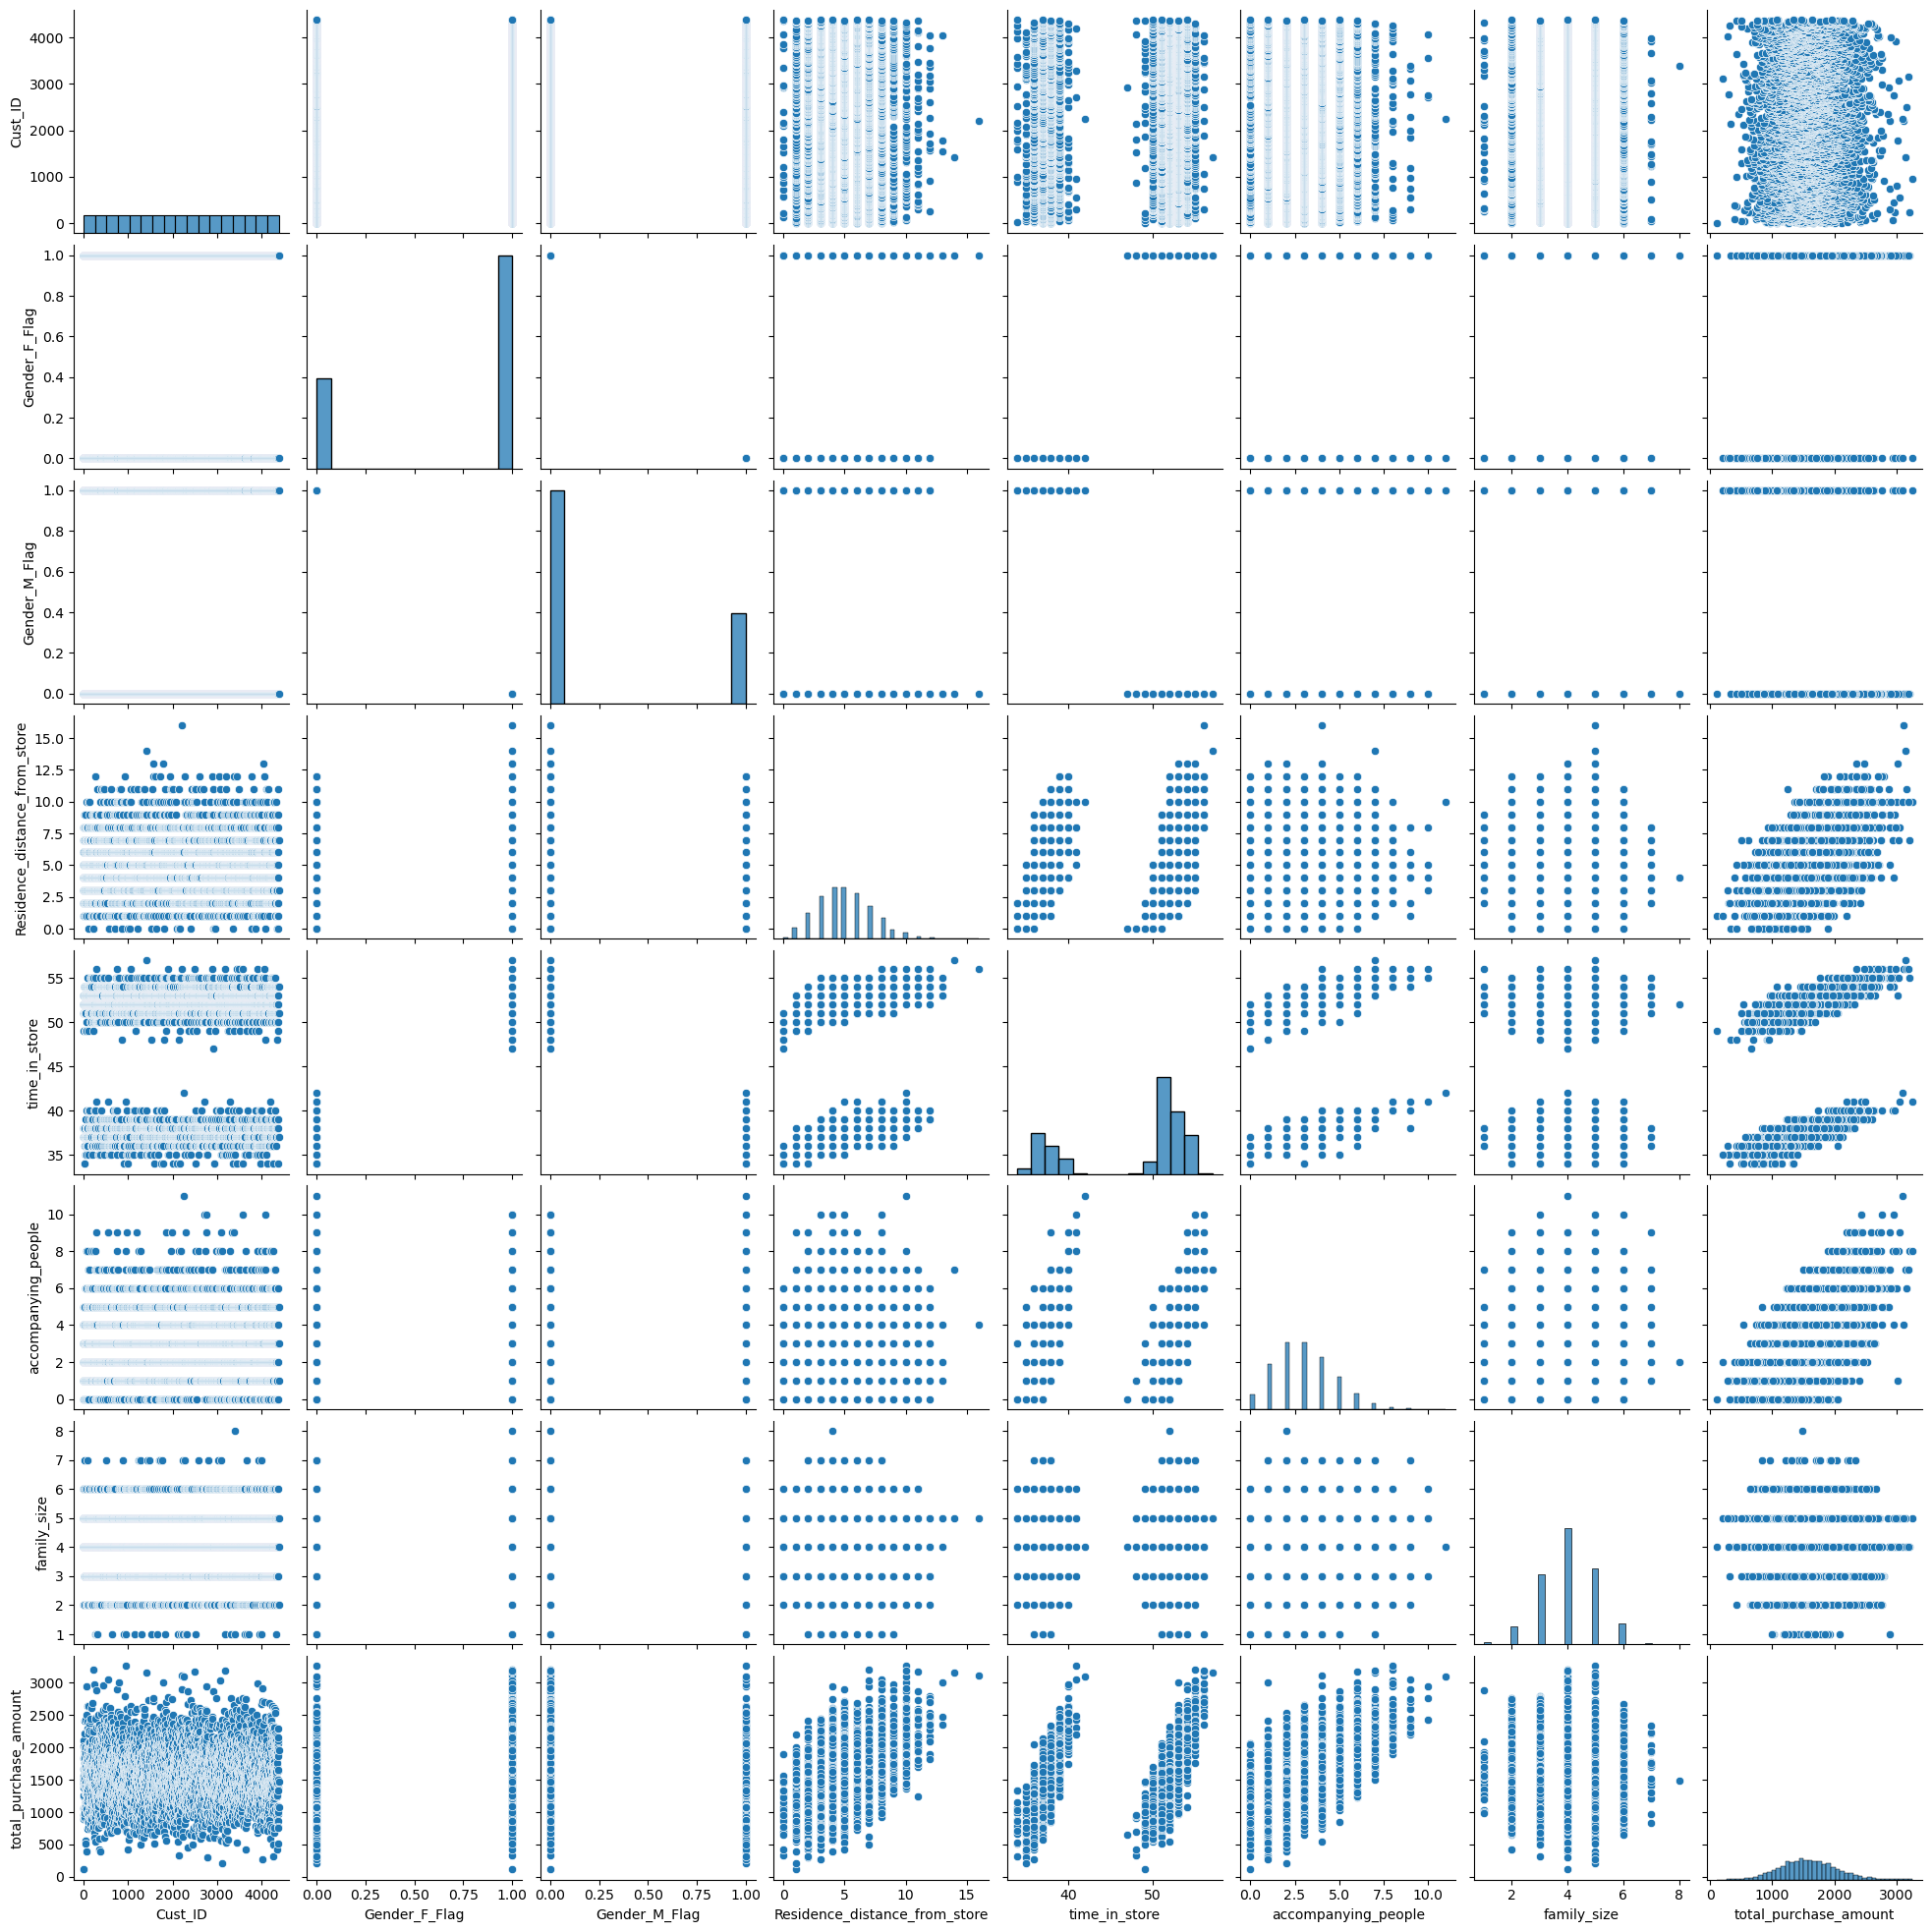

In [30]:
sns.pairplot(data)
plt.show()

# From the Pairplot  the Information we get about Total Purchase Amount is that  it is normally distributed
# Thier is relation between Residence Distance from Store ,Time in Store,Accompanying People with Total Purchase Amount

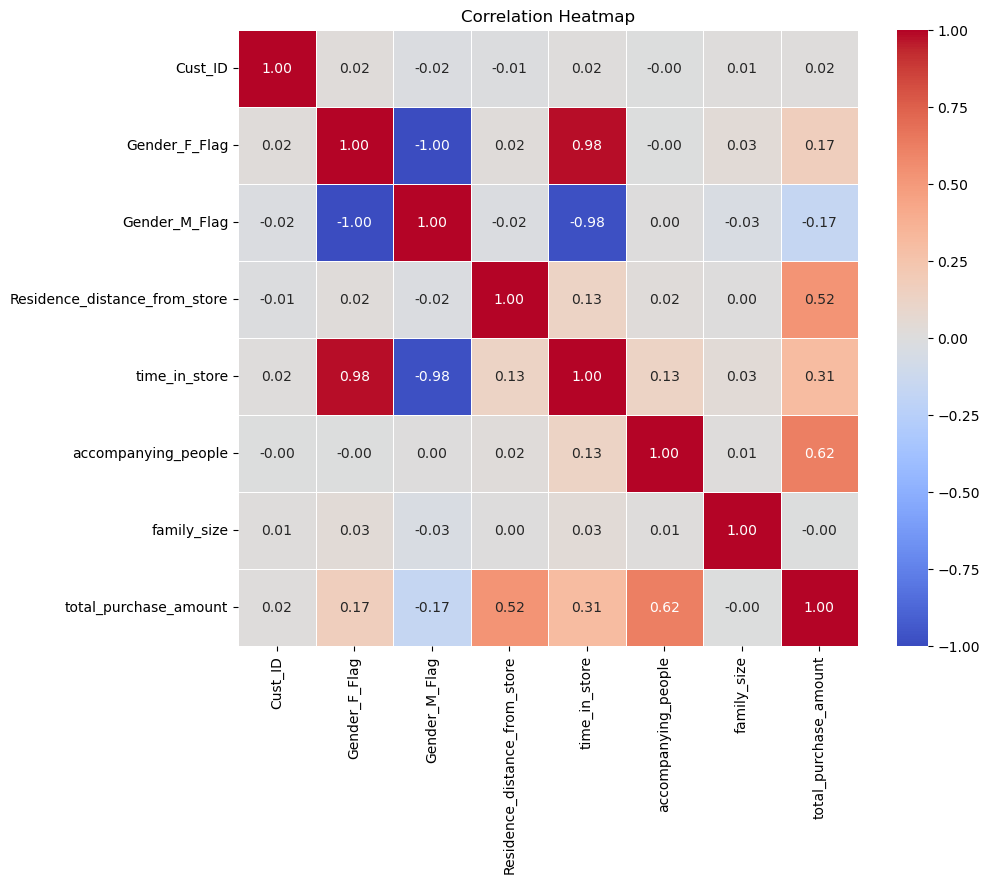

In [31]:

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


# Making and Testing a Regression Model using the three parameters 
### 'accompanying_people','time_in_store','Residence_distance_from_store' 

# This decision is taken as in correlation heat map this parameters show resemblance to a great factor and also thier is a visible pattern in pair plot

In [44]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

data_df = data

# Step 2: Split the data into training and testing sets
train_data_df, test_data_df = train_test_split(data_df, test_size=0.2, random_state=42)

# Step 3: Fit a Linear Regression model using OLS on train_data
X_train = train_data_df[['accompanying_people','time_in_store','Residence_distance_from_store']]  # assuming 'y' is the dependent variable
X_train = sm.add_constant(X_train)
y_train = train_data_df['total_purchase_amount']

model = sm.OLS(y_train, X_train).fit()

# Step 4: Print out a summary of the model
print("--------------------------------------------------")
print(model.summary())

# Step 5: Print out R2 and MSE using train_data
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

print("--------------------------------------------------")
print(f"R2 on train_data: {r2_train}")
print(f"MSE on train_data: {mse_train}")

# Step 6: Using test_data, predict 'y' values and calculate test R2 and MSE
X_test = test_data_df[['accompanying_people','time_in_store','Residence_distance_from_store']]
X_test = sm.add_constant(X_test)
y_test = test_data_df['total_purchase_amount']

y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("--------------------------------------------------")
print(f"R2 on test_data: {r2_test}")
print(f"MSE on test_data: {mse_test}")
print("--------------------------------------------------")


--------------------------------------------------
                              OLS Regression Results                             
Dep. Variable:     total_purchase_amount   R-squared:                       0.679
Model:                               OLS   Adj. R-squared:                  0.679
Method:                    Least Squares   F-statistic:                     2469.
Date:                   Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                           12:49:20   Log-Likelihood:                -24305.
No. Observations:                   3504   AIC:                         4.862e+04
Df Residuals:                       3500   BIC:                         4.864e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

# R^2 value of model is 0.679 ( quite low in accuracy).

# Durbin watson and Jarque bera test suggest error follow normal distribution which is good 

# Omnibus test shows low value and high p value reveling same normal distribution of errors when using this model


# The most significant Outcome is the Conditional No. which is 346 and is very high and thus revealing our current model is too much unreliable and needs to be made more significant

# Evaluation of Linear Regression and RF on data

In [48]:
# Assuming 'data' is your original DataFrame

# Data Cleaning and Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Residence_distance_from_store', 'time_in_store']])
data[['Scaled_Distance', 'Scaled_Time']] = pd.DataFrame(scaled_data, columns=['Residence_distance_from_store', 'time_in_store'])

# Feature Engineering
X = data[['Gender_F_Flag', 'Gender_M_Flag', 'Scaled_Distance', 'Scaled_Time', 'accompanying_people', 'family_size']]
y_purchase = data['total_purchase_amount']
y_engagement = data['time_in_store']

# Model Building
X_train, X_test, y_train_purchase, y_test_purchase, y_train_engagement, y_test_engagement = train_test_split(
    X, y_purchase, y_engagement, test_size=0.2, random_state=42
)

# Build Linear Regression models
lr_purchase = LinearRegression()
lr_engagement = LinearRegression()

lr_purchase.fit(X_train, y_train_purchase)
lr_engagement.fit(X_train, y_train_engagement)

# Build Random Forest models
rf_purchase = RandomForestRegressor()
rf_engagement = RandomForestRegressor()

rf_purchase.fit(X_train, y_train_purchase)
rf_engagement.fit(X_train, y_train_engagement)

# Evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} Mean Squared Error: {mse}")




In [51]:
# Evaluate Linear Regression models
evaluate_model(lr_purchase, X_test, y_test_purchase, "Linear Regression (Purchase)")
evaluate_model(lr_engagement, X_test, y_test_engagement, "Linear Regression (Engagement)")

# Evaluate Random Forest models
evaluate_model(rf_purchase, X_test, y_test_purchase, "Random Forest (Purchase)")
evaluate_model(rf_engagement, X_test, y_test_engagement, "Random Forest (Engagement)")

# Feature Importance Analysis for Random Forest models
def plot_feature_importance(model, feature_names, model_name):
    feature_importance = model.feature_importances_
    sorted_idx = feature_importance.argsort()[::-1]

    sns.barplot(x=feature_importance[sorted_idx], y=feature_names[sorted_idx])
    plt.title(f"{model_name} - Feature Importance")
    plt.show()



Linear Regression (Purchase) Mean Squared Error: 62621.71732305936
Linear Regression (Engagement) Mean Squared Error: 9.665167036022917e-29
Random Forest (Purchase) Mean Squared Error: 73494.81880476882
Random Forest (Engagement) Mean Squared Error: 0.001142694063926941


# Here Indeed Linear Regression Performed better than RF.

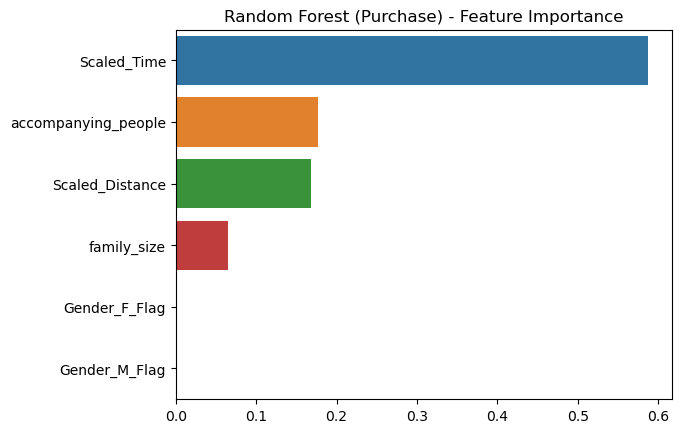

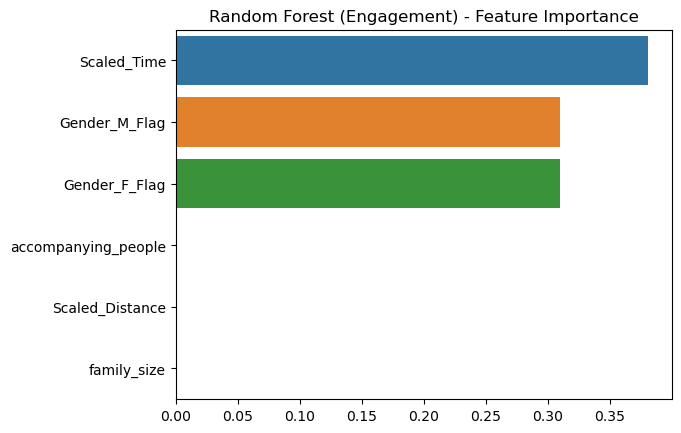

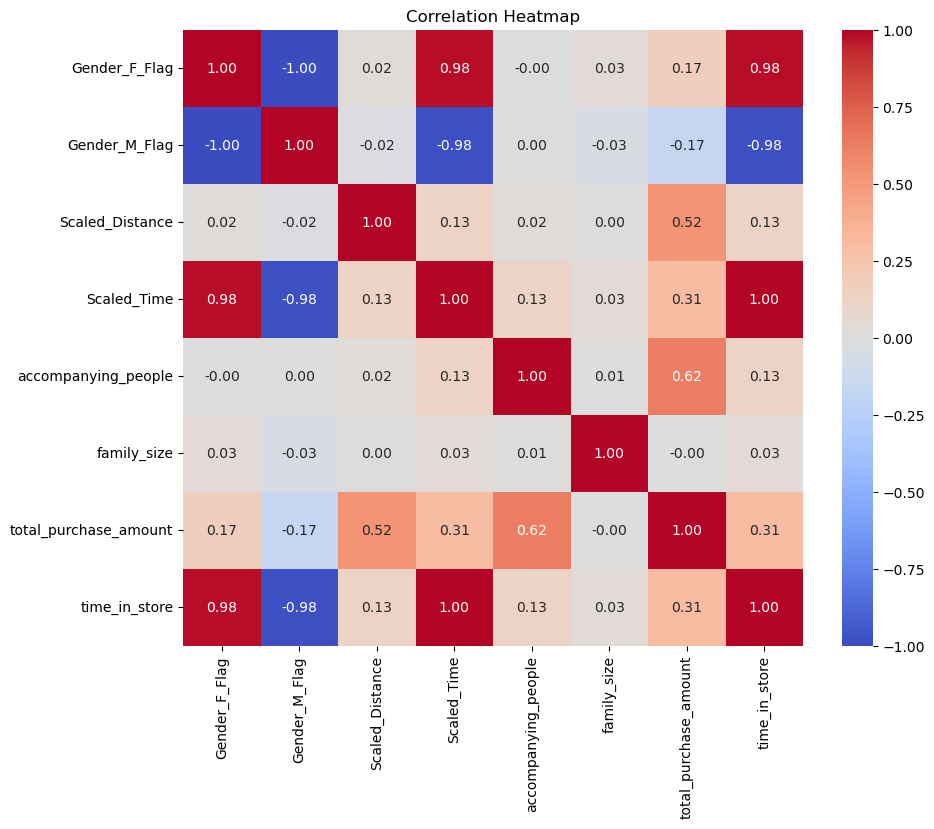

In [52]:
plot_feature_importance(rf_purchase, X.columns, "Random Forest (Purchase)")
plot_feature_importance(rf_engagement, X.columns, "Random Forest (Engagement)")

# Heatmap for correlation
correlation_matrix = data[['Gender_F_Flag', 'Gender_M_Flag', 'Scaled_Distance', 'Scaled_Time', 'accompanying_people', 'family_size', 'total_purchase_amount', 'time_in_store']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Making Prediction Model for Overall Value of Purchases

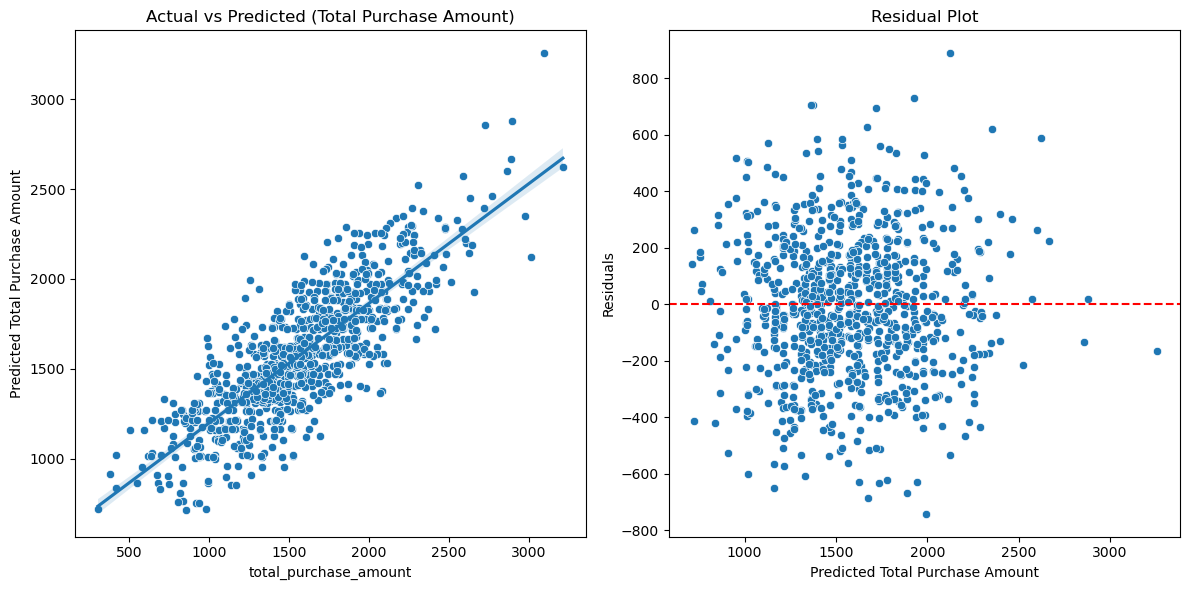

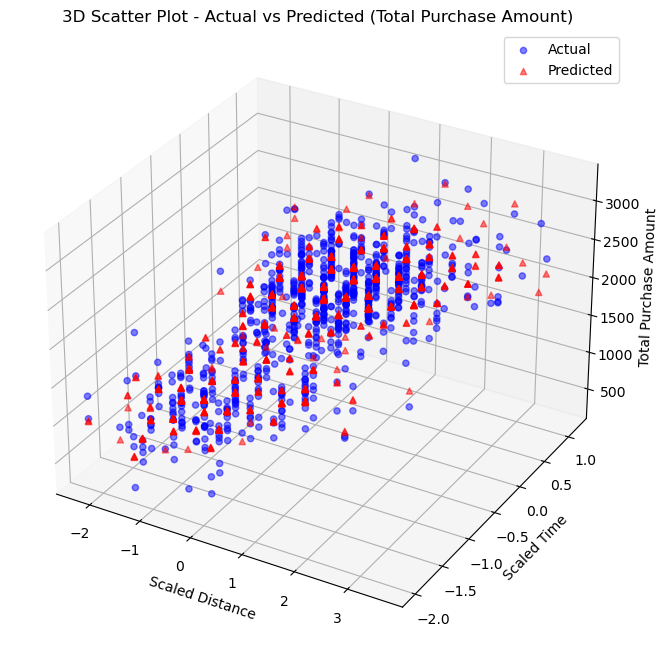

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Assuming lr_purchase is your Linear Regression model for predicting total_purchase_amount

# Predictions on the test set
y_pred_purchase = lr_purchase.predict(X_test)

# Scatter plot with regression line
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_purchase, y=y_pred_purchase)
plt.title('Actual vs Predicted (Total Purchase Amount)')
plt.xlabel('Actual Total Purchase Amount')
plt.ylabel('Predicted Total Purchase Amount')
sns.regplot(x=y_test_purchase, y=y_pred_purchase, scatter=False, ax=plt.gca())

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test_purchase - y_pred_purchase
sns.scatterplot(x=y_pred_purchase, y=residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Total Purchase Amount')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# 3D Scatter plot for multivariate linear regression
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['Scaled_Distance'], X_test['Scaled_Time'], y_test_purchase, c='blue', marker='o', alpha=0.5, label='Actual')
ax.scatter(X_test['Scaled_Distance'], X_test['Scaled_Time'], y_pred_purchase, c='red', marker='^', alpha=0.5, label='Predicted')

ax.set_xlabel('Scaled Distance')
ax.set_ylabel('Scaled Time')
ax.set_zlabel('Total Purchase Amount')

plt.title('3D Scatter Plot - Actual vs Predicted (Total Purchase Amount)')
plt.legend()
plt.show()


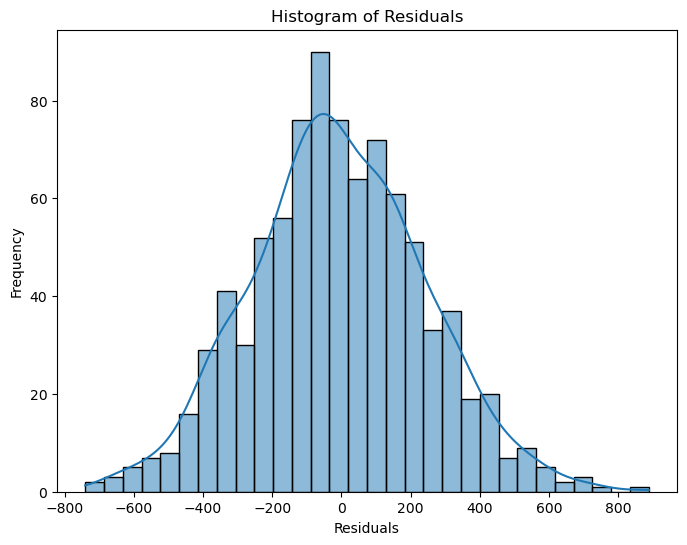

In [60]:
# Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Errors follow Normal Distribution

#  Now we would be working to predict Time duration of Customer in store

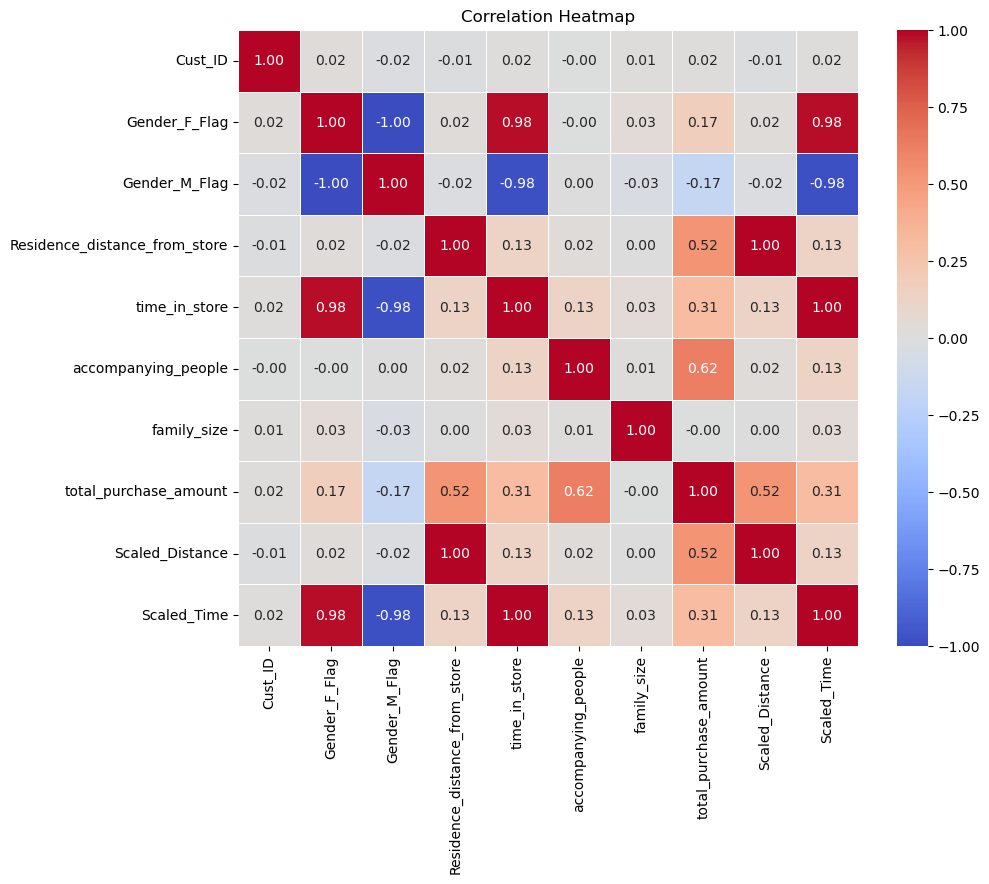

In [64]:

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


# Here total duration is store is mostly dependent on parameters 'Gender_F_Flag' ,'Gender_M_Flag' and Total Purchasing Amount and slightly on parameters like 

In [69]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

data_df = data

# Step 2: Split the data into training and testing sets
train_data_df, test_data_df = train_test_split(data_df, test_size=0.2, random_state=42)

# Step 3: Fit a Linear Regression model using OLS on train_data
X_train = train_data_df[['Gender_F_Flag' ,'Gender_M_Flag','total_purchase_amount']]  # assuming 'y' is the dependent variable
X_train = sm.add_constant(X_train)
y_train = train_data_df['time_in_store']

model = sm.OLS(y_train, X_train).fit()

# Step 4: Print out a summary of the model
print("--------------------------------------------------")
print(model.summary())

# Step 5: Print out R2 and MSE using train_data
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

print("--------------------------------------------------")
print(f"R2 on train_data: {r2_train}")
print(f"MSE on train_data: {mse_train}")

# Step 6: Using test_data, predict 'y' values and calculate test R2 and MSE
X_test = test_data_df[['Gender_F_Flag' ,'Gender_M_Flag','total_purchase_amount']] 
X_test = sm.add_constant(X_test)
y_test = test_data_df['time_in_store']

y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("--------------------------------------------------")
print(f"R2 on test_data: {r2_test}")
print(f"MSE on test_data: {mse_test}")
print("--------------------------------------------------")


--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:          time_in_store   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.376e+05
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:33:25   Log-Likelihood:                -4127.7
No. Observations:                3504   AIC:                             8261.
Df Residuals:                    3501   BIC:                             8280.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

# From the Above Tests it was clear making a Linear Regression model for such would be very unhelpful thus we thought to proceed to using PCA

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming your data is stored in a DataFrame called 'df'
# Drop Cust_ID as it's not informative for the model
df=data
df = df.drop('Cust_ID', axis=1)

# Handling categorical variables (if needed)
# e.g., df['Gender'] = df['Gender_F_Flag'] + 2 * df['Gender_M_Flag']

# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components based on explained variance
df_pca = pca.fit_transform(df_scaled)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_pca, df['time_in_store'], test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.2492366594029411
Mean Squared Error: 0.10154349207478548
R-squared: 0.9978420028864566


# Distribution Plot for Feature Analysis

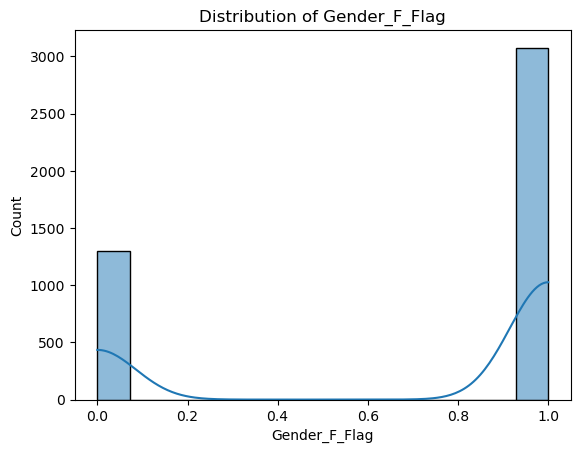

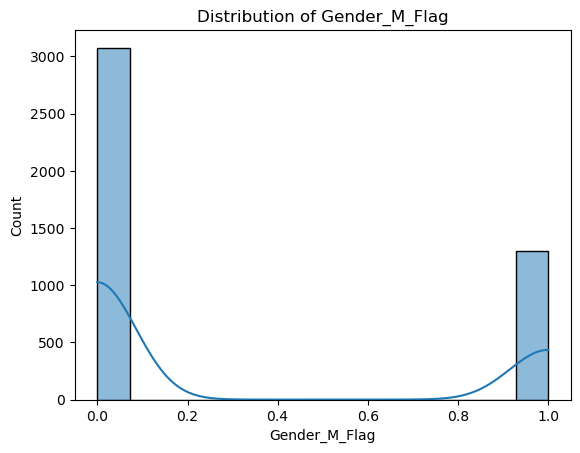

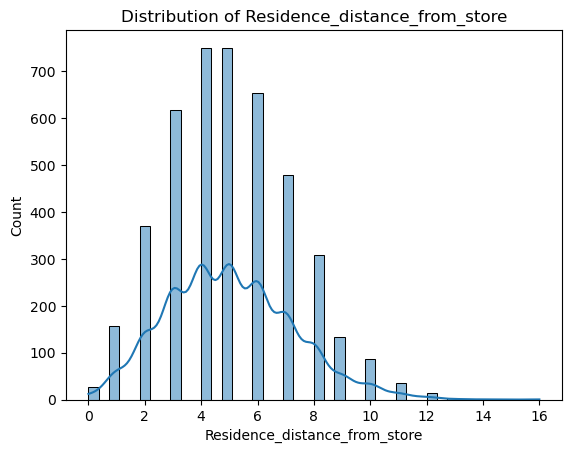

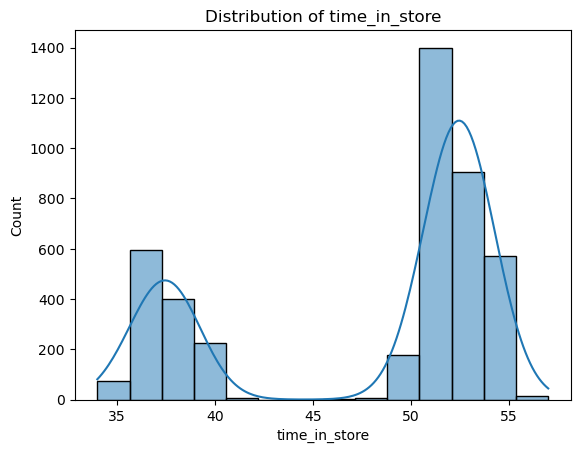

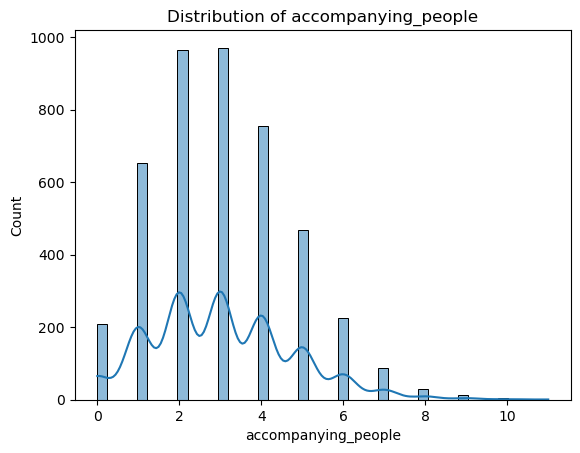

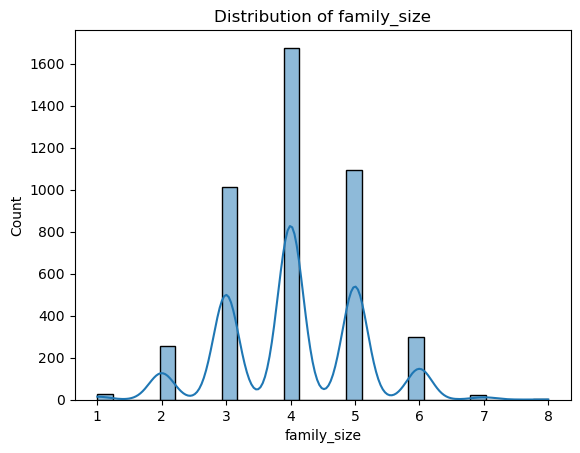

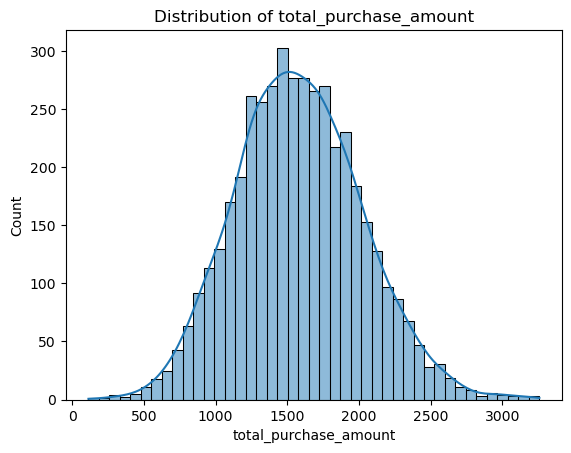

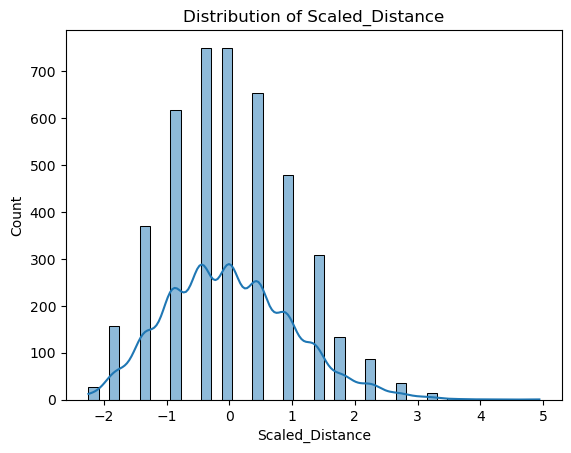

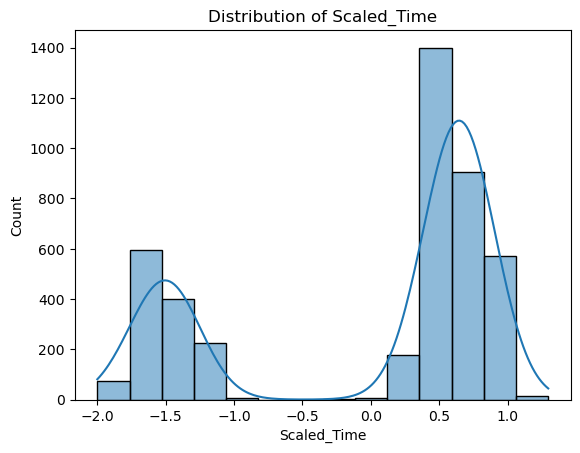

In [75]:
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

Mean Absolute Error: 0.24923665940294143
Mean Squared Error: 0.1015434920747856
R-squared: 0.9978420028864566


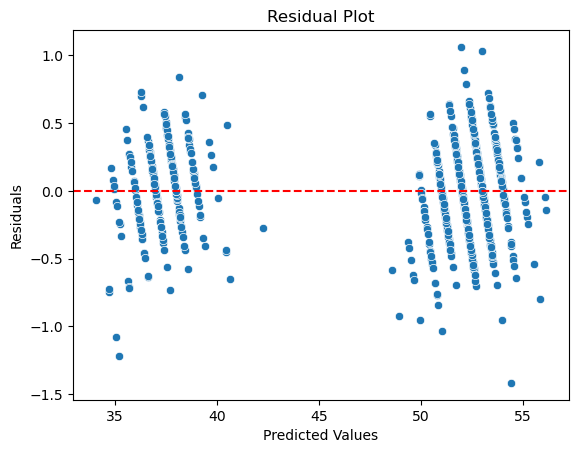

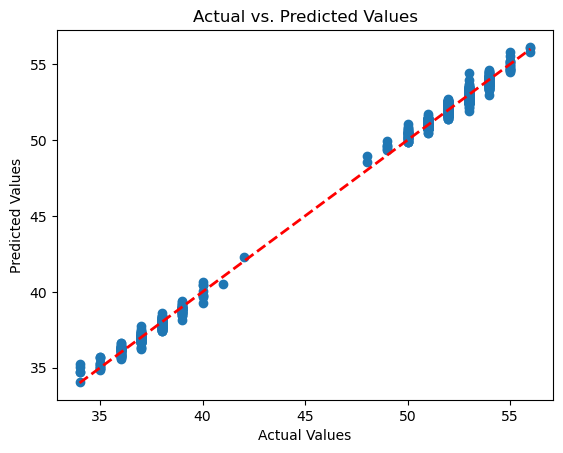

In [84]:

df=data
# Assuming your data is stored in a DataFrame called 'df'
# Drop Cust_ID as it's not informative for the model
df = df.drop('Cust_ID', axis=1)

# Handling categorical variables (if needed)
# e.g., df['Gender'] = df['Gender_F_Flag'] + 2 * df['Gender_M_Flag']

# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components based on explained variance
df_pca = pca.fit_transform(df_scaled)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_pca, df['time_in_store'], test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Residual Plot
residuals = y_test - predictions
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Actual vs. Predicted Plot
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


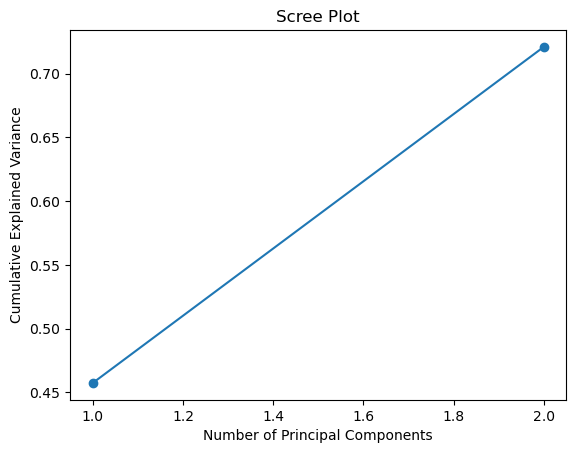

In [85]:
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

plt.plot(range(1, len(explained_var)+1), cumulative_var, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [86]:
import scipy.stats as stats

# Example: t-test for Gender_F_Flag
female_purchase = df[df['Gender_F_Flag'] == 1]['total_purchase_amount']
male_purchase = df[df['Gender_M_Flag'] == 1]['total_purchase_amount']

t_stat, p_value = stats.ttest_ind(female_purchase, male_purchase)

print(f'T-test for Gender_F_Flag: T-statistic = {t_stat}, p-value = {p_value}')


T-test for Gender_F_Flag: T-statistic = 11.341865263010032, p-value = 2.0861989151043958e-29


In [87]:
correlation, p_value = stats.pearsonr(df['time_in_store'], df['total_purchase_amount'])

print(f'Pearson Correlation: {correlation}, p-value = {p_value}')


Pearson Correlation: 0.3051397613137683, p-value = 4.814808632662768e-95


# 1. T-test for Gender_F_Flag:

## Interpretation:
 ### T-statistic: 11.34
### P-value: 2.09e-29 (very close to zero)
Analysis:
The t-test results suggest a significant difference in total purchase amounts between customers identified as female (Gender_F_Flag = 1) and customers identified as male (Gender_M_Flag = 1). The extremely low p-value indicates strong evidence against the null hypothesis of no difference.

Recommendations:
Targeted Marketing: Given the significant difference in purchase amounts, consider targeted marketing strategies for each gender group.
Gender-Specific Offers: Tailor promotional offers or incentives to appeal to the purchasing patterns of each gender group.
2. Pearson Correlation between Time in Store and Total Purchase Amount:
Interpretation:
Correlation Coefficient: 0.31
P-value: 4.81e-95 (very close to zero)
Analysis:
The Pearson correlation results indicate a moderate positive correlation (0.31) between the time a customer spends in the store and their total purchase amount. The extremely low p-value suggests that this correlation is statistically significant.

Recommendations:
Enhance In-Store Experience: Focus on initiatives that encourage customers to spend more time in the store, such as interactive displays, events, or promotions.
Optimize Staffing: Since time in store is correlated with purchase amount, optimize staffing levels during peak times to ensure adequate assistance for customers.
Addressing Executive Questions:
a. Increase Sales:
Leverage the insights from the t-test to tailor marketing strategies for different gender groups.
Consider implementing gender-specific promotions or advertising campaigns to enhance engagement.
b. Impact of Increased Time in Store:
Communicate the positive correlation between time in store and total purchase amount.
Suggest strategies to motivate customers to stay longer, such as creating a more engaging in-store environment.